In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install numpy

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show keras

Name: keras
Version: 3.2.1
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\SIVA KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow.keras.utils import to_categorical

In [ ]:
##importing libraries

In [3]:
import tensorflow as tf  # Import TensorFlow for compatibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical  # Use TensorFlow's to_categorical
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
import pandas as pd
import cv2


In [ ]:
pip install np_utils

In [29]:
!pip install opencv-python

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random 
import pandas as pd
import cv2

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
#Assigning Path for Dataset

In [7]:
data_dir = r"C:\Users\SIVA KUMAR\Downloads\GTTSB"
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [8]:
import os
Root = r"C:\Users\SIVA KUMAR\Downloads\GTTSB"
os.chdir(Root)

In [9]:
#Finding Total Classes

In [10]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [11]:
# declaring signs names for the folders 

In [12]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
#Visualizing The Dataset

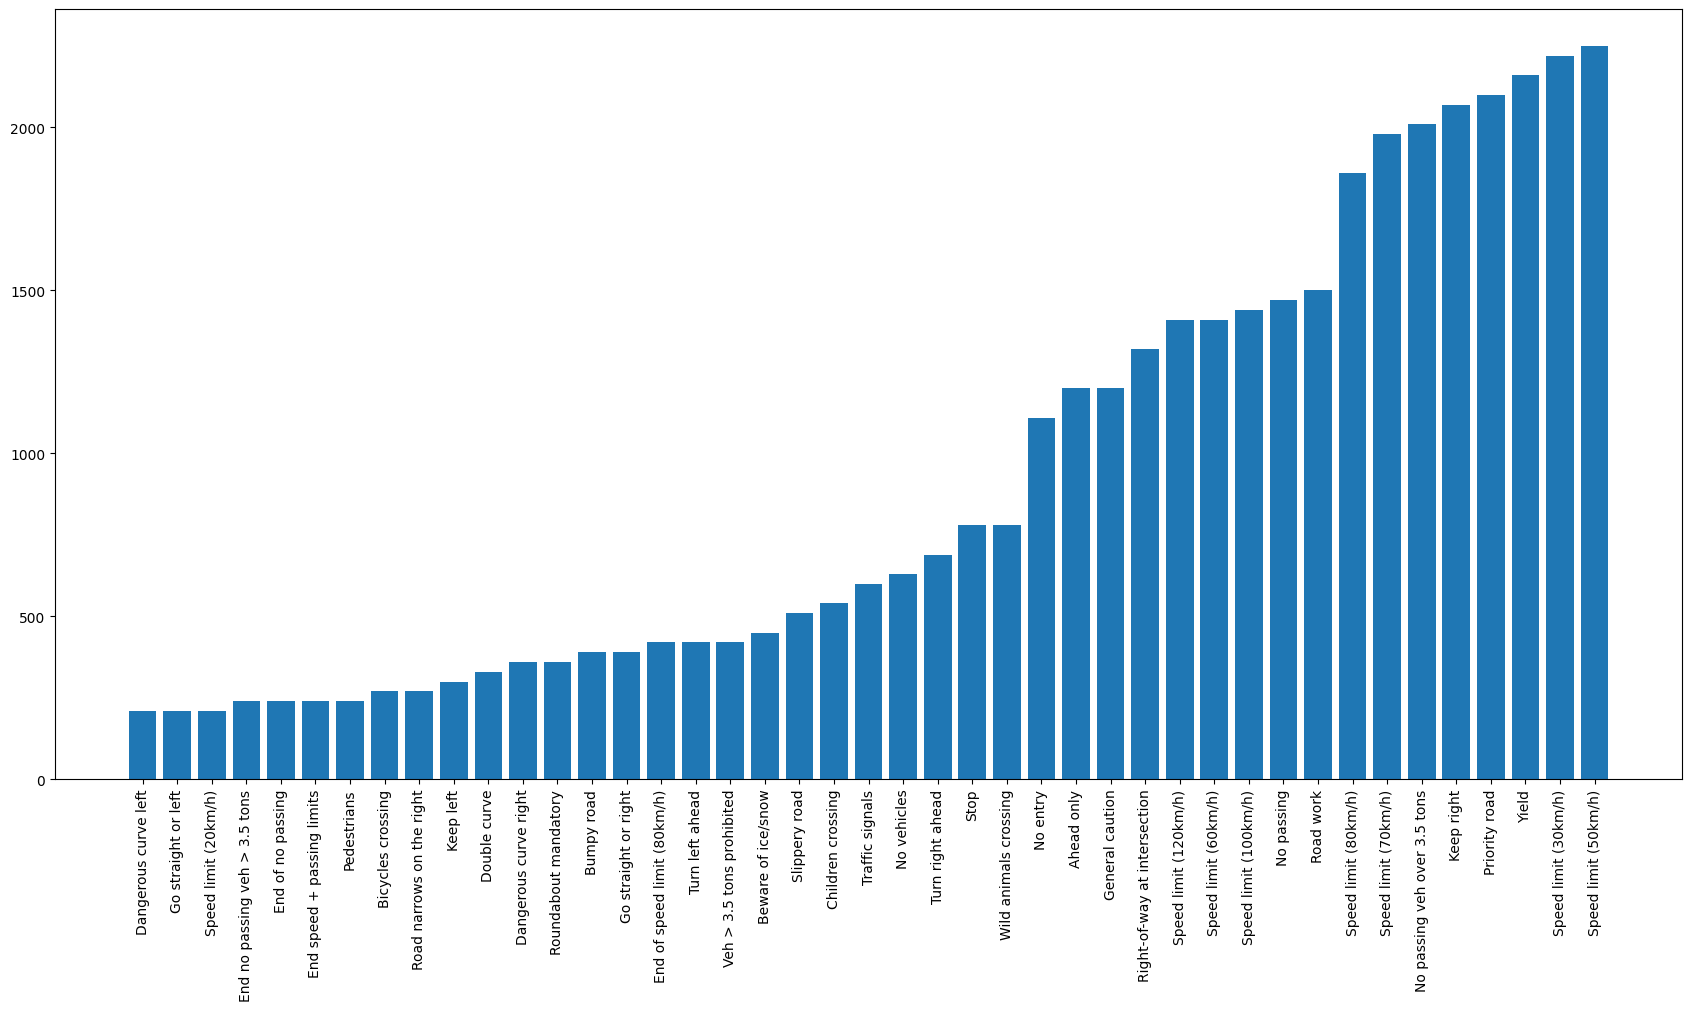

In [15]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

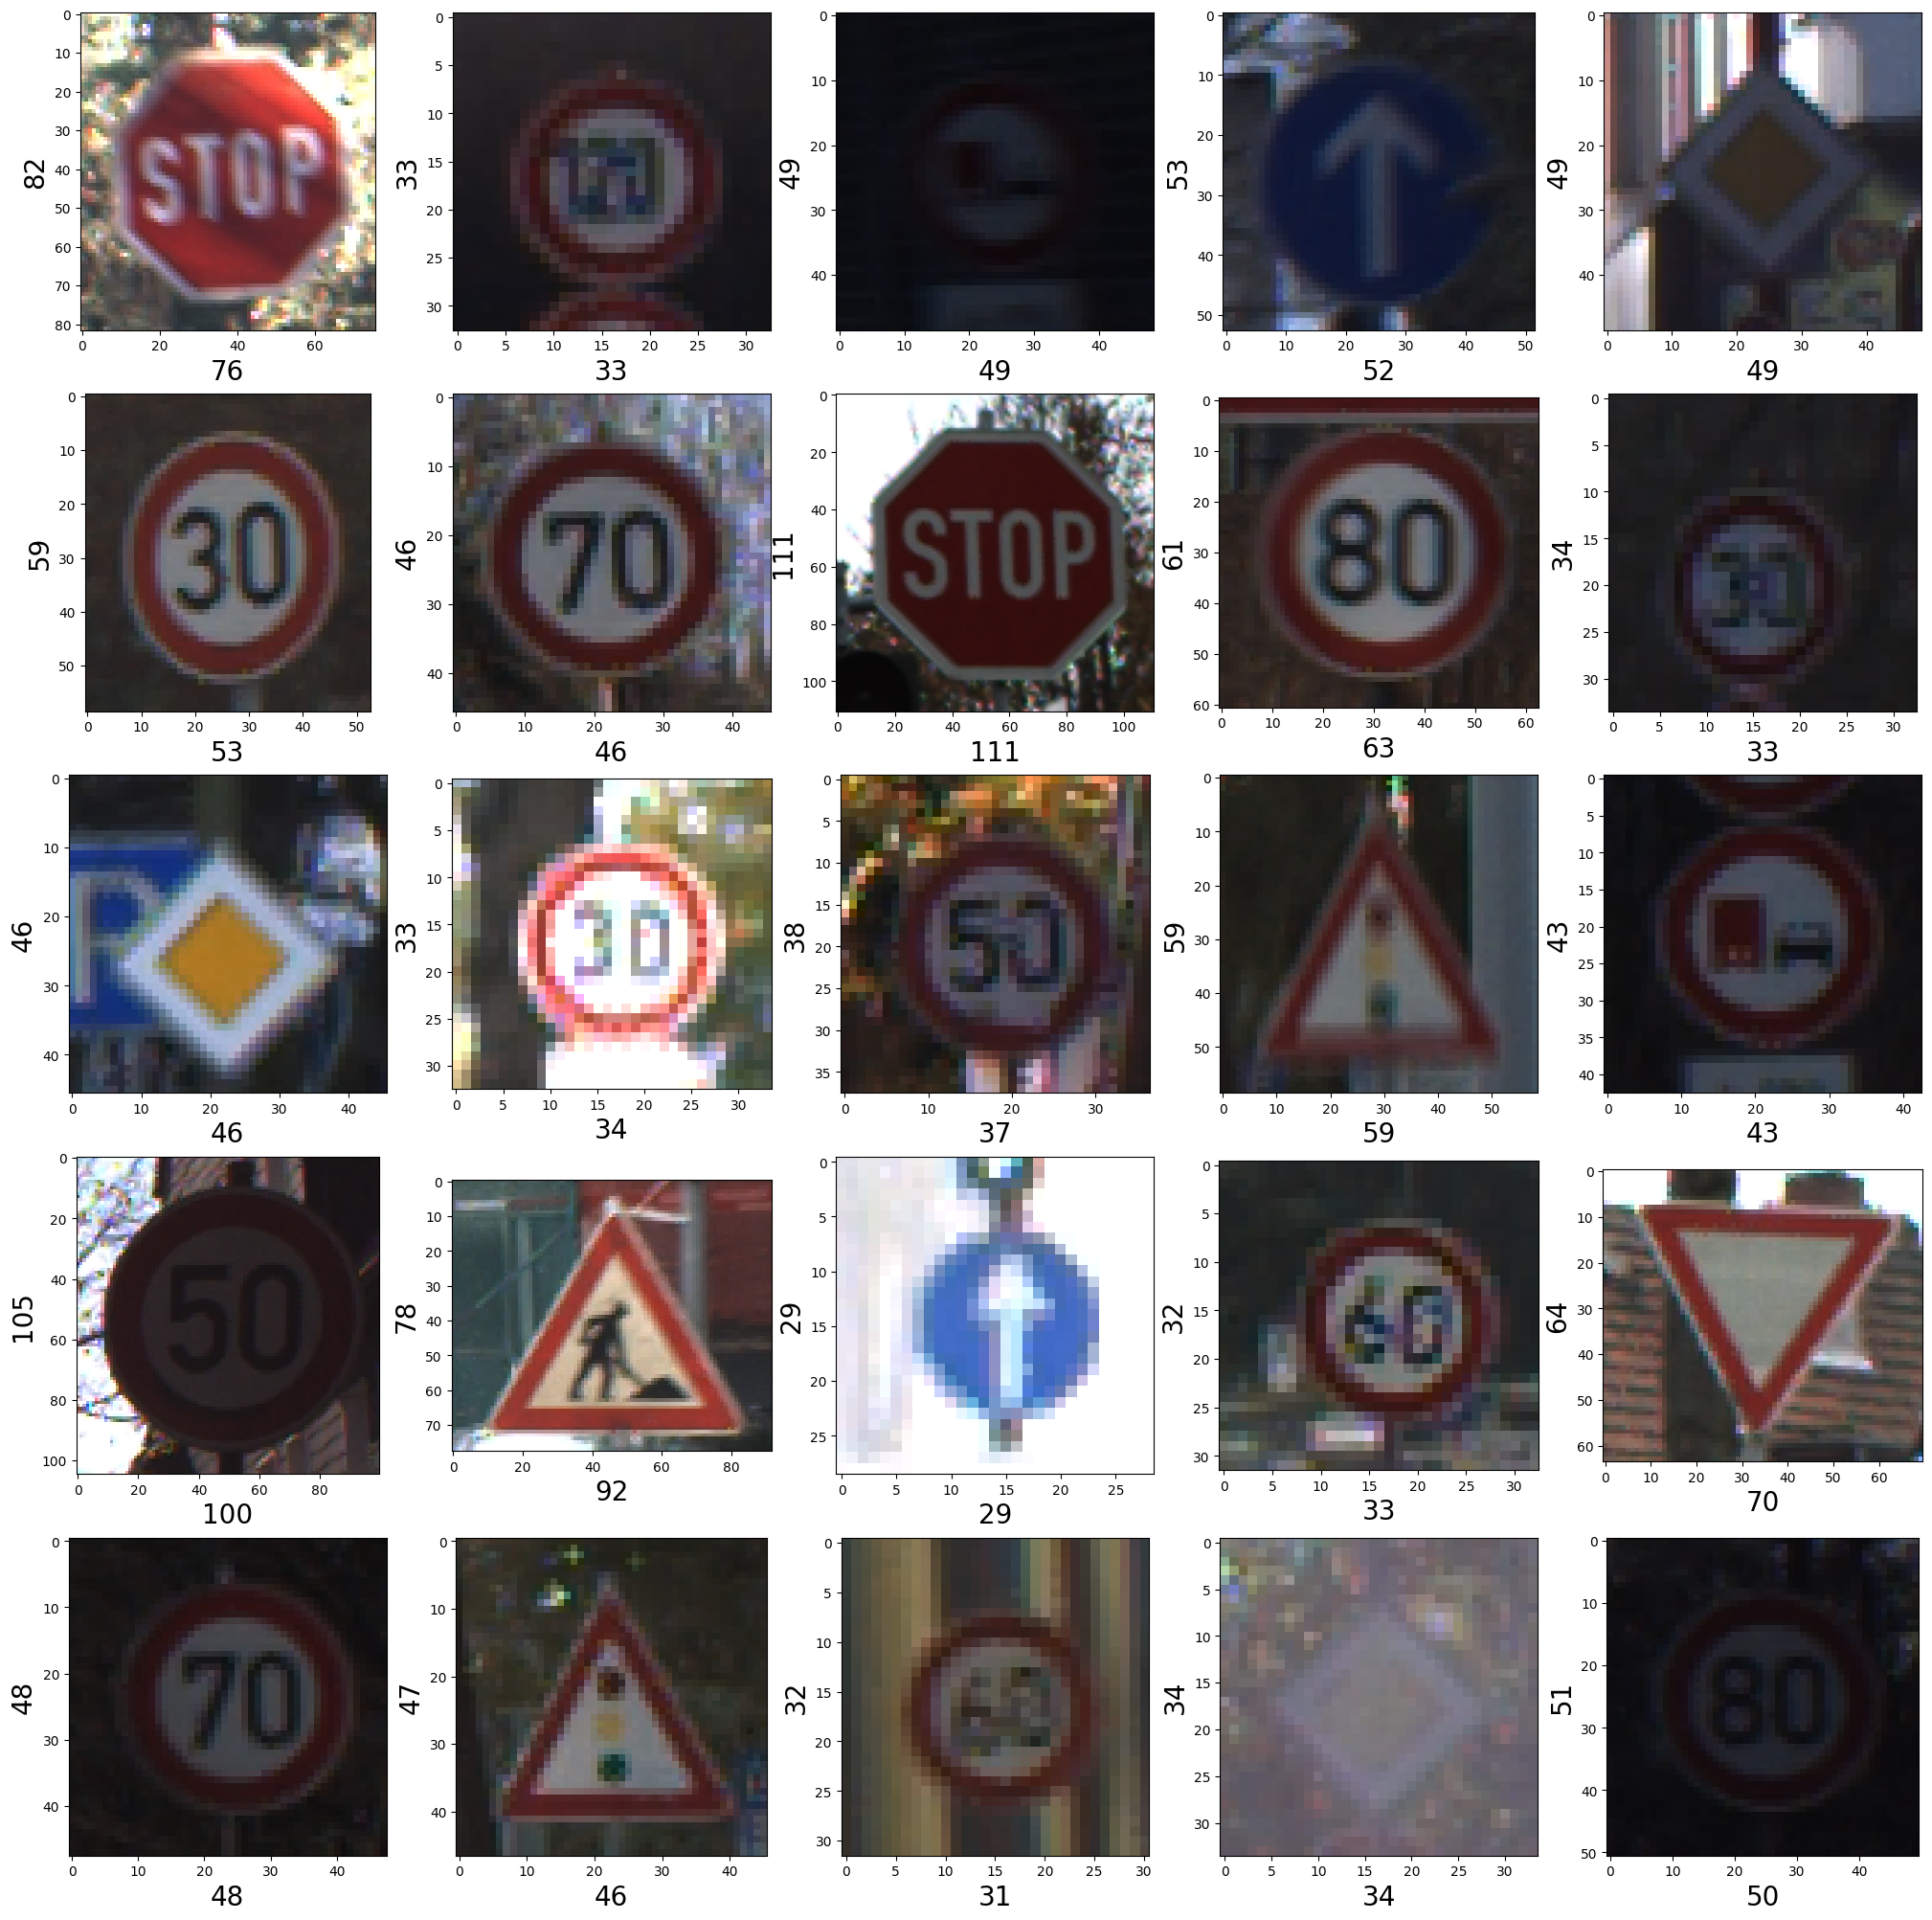

In [16]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)  # Turn off grid completely
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [17]:
#Collecting the Training Data

In [17]:
from PIL import Image  # Import the Image class from Pillow

image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
  path = data_dir + '/Train/' + str(i)
  images = os.listdir(path)

  for img in images:
    try:
      image_path = path + '/' + img
      print(f"Reading image: {image_path}")  # Print path for verification

      image = cv2.imread(image_path)
      if image is not None:
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)
      else:
        print(f"Error reading image: {image_path}")
    except cv2.error as e:
      print(f"Error in {img}: {e}")

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00000.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00001.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00002.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00003.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00004.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00005.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00006.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00007.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00008.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00009.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00010.png
Reading image: C:\Users\SIVA KUMAR\Downloads\GTTSB/Train/0/00000_00000_00011.png
Reading image: C:\Users\SIVA

In [ ]:
pip install Pillow


In [ ]:
#Training Data

In [18]:
from PIL import Image  # Import the Image class from Pillow

image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
  path = data_dir + '/Train/' + str(i)
  print(i)
  images = os.listdir(path)

  for img in images:
    try:  # Indent the try block
      image = cv2.imread(path + '/' + img)
      if image is not None:  # Indent the if statement
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)
      else:
        print("Error in " + img)
    except cv2.error as e:  # Add an except block to handle potential OpenCV errors
      print(f"Error in {img}: {e}")

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
(39209, 30, 30, 3) (39209,)


In [18]:
#Shuffling the training data

In [19]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
pip install scikit-learn

In [ ]:
#Splitting the data into train and validation set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [21]:
#One hot encoding the labels

In [21]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
# from tensorflow.keras.applications import VGG16  # Adjust base model as needed
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.models import Model

# # Define higher input resolution (assuming 2x original)
# IMG_HEIGHT, IMG_WIDTH = 60, 60  # Adjust based on your higher resolution dataset

# # Load the pre-trained model (e.g., VGG16) pre-trained on ImageNet
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# # Freeze the base model layers (optional, adjust as needed)
# for layer in base_model.layers:
#   layer.trainable = False

# # Add custom layers for classification
# x = base_model.output
# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(43, activation='softmax')(x)  # Adjust num_classes

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model on your higher resolution dataset (code not shown here)


In [23]:
#Making the model

In [22]:
from tensorflow import keras
input_shape = (IMG_HEIGHT, IMG_WIDTH, channels)
model = keras.models.Sequential([    
    
    keras.layers.Input(shape=input_shape),  # Define input shape here

    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

C:\Users\SIVA KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,171,275 (4.47 MB)

 Trainable params: 1,169,931 (4.46 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [25]:
lr = 0.001
epochs = 10

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [26]:
#Augmenting the data and training the model

In [27]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10


C:\Users\SIVA KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.5034 - loss: 2.0276 - val_accuracy: 0.9443 - val_loss: 0.1839
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9353 - loss: 0.2124 - val_accuracy: 0.9871 - val_loss: 0.0454
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9631 - loss: 0.1223 - val_accuracy: 0.9929 - val_loss: 0.0246
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9716 - loss: 0.0900 - val_accuracy: 0.9958 - val_loss: 0.0134
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.9739 - loss: 0.0808 - val_accuracy: 0.9939 - val_loss: 0.0188
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9753 - loss: 0.0781 - val_accuracy: 0.9811 - val_loss: 0.0599
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9814 - loss: 0.0611 - val_accuracy: 0.9951 - val_loss: 0.0168
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9809 - loss: 0.0601 - val_accurac

In [28]:
model.save("model.h5")

In [29]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize'

In [31]:
#Evaluating the model

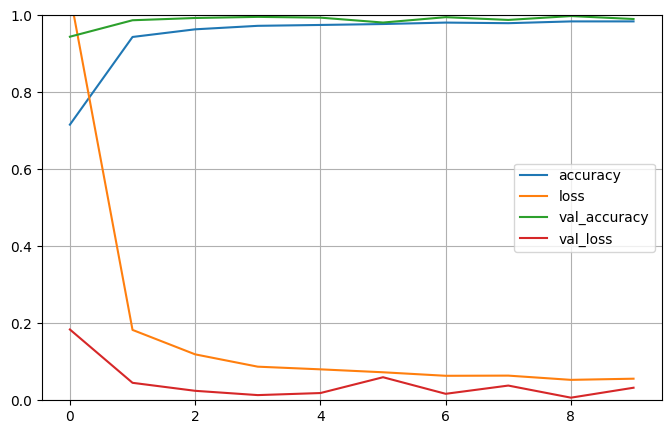

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.save_weights("./weights.weights.h5")

In [32]:
#Loading the test data and running the predictions

In [33]:
test = pd.read_csv(data_dir + '/Test.csv')
from sklearn.metrics import accuracy_score
labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
  try:
    image = cv2.imread(data_dir + '/' +img)
    image_fromarray = Image.qfromarray(image, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    data.append(np.array(resize_image))
  except:
    print("Error in " + img)

X_test = np.array(data)
X_test = X_test / 255.0  # Normalize pixel values
print(X_test[1])
pred = model.predict(X_test).round()
pred_classes = np.argmax(pred, axis=-1) 

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred_classes) * 100)


[[[0.23921569 0.28235294 0.24313725]
  [0.24705882 0.31764706 0.34901961]
  [0.25490196 0.32156863 0.36862745]
  ...
  [0.26666667 0.25098039 0.30588235]
  [0.2627451  0.25490196 0.28235294]
  [0.26666667 0.26666667 0.29019608]]

 [[0.23529412 0.28235294 0.25098039]
  [0.25490196 0.3254902  0.38039216]
  [0.24705882 0.31764706 0.38039216]
  ...
  [0.25490196 0.24705882 0.29411765]
  [0.27843137 0.27058824 0.36470588]
  [0.26666667 0.26666667 0.34509804]]

 [[0.23529412 0.27843137 0.23137255]
  [0.25882353 0.3254902  0.35686275]
  [0.24705882 0.31764706 0.37254902]
  ...
  [0.24705882 0.24705882 0.26666667]
  [0.26666667 0.2627451  0.29803922]
  [0.2745098  0.27058824 0.30588235]]

 ...

 [[0.18039216 0.2        0.20392157]
  [0.22745098 0.27058824 0.31764706]
  [0.22352941 0.2627451  0.31372549]
  ...
  [0.24705882 0.24705882 0.2745098 ]
  [0.25882353 0.2627451  0.3254902 ]
  [0.2627451  0.25882353 0.30588235]]

 [[0.18823529 0.19607843 0.20784314]
  [0.24313725 0.2627451  0.31372549]


In [34]:
filters,biases=model.layers[0].get_weights()
print(filters)    #printg filters

[[[[-0.05366911  0.11514333  0.09011715  0.1259636   0.07806113
    -0.090465   -0.17786297  0.06187161  0.04428887 -0.02600756
     0.14896356  0.15229484  0.2300874   0.20099296 -0.0011202
     0.01083997]
   [ 0.06545182  0.02739192 -0.01872684  0.09289796  0.14406015
     0.11284185 -0.07466384  0.00956206 -0.20039207 -0.19152218
     0.2565939   0.14703888  0.20766841  0.07201285  0.03802711
    -0.10520714]
   [ 0.1201956  -0.0317615   0.19741371 -0.07763435 -0.08269329
    -0.02186611  0.00235755 -0.0016913  -0.03032901 -0.11911221
     0.16368149 -0.13445291  0.24313112  0.10019255  0.06633823
    -0.26302382]]

  [[ 0.07324144 -0.19697608 -0.15788016 -0.0793202   0.15441176
     0.19725242 -0.10560243 -0.18017873 -0.08965614 -0.02518548
     0.03161687 -0.00377273  0.07175022  0.02009313 -0.21117243
     0.13038352]
   [-0.20584328 -0.10751209 -0.17996264 -0.11312804  0.06608838
    -0.1388029  -0.07779468  0.09167374 -0.21047202  0.07543989
     0.2642914  -0.08917123  0.0948

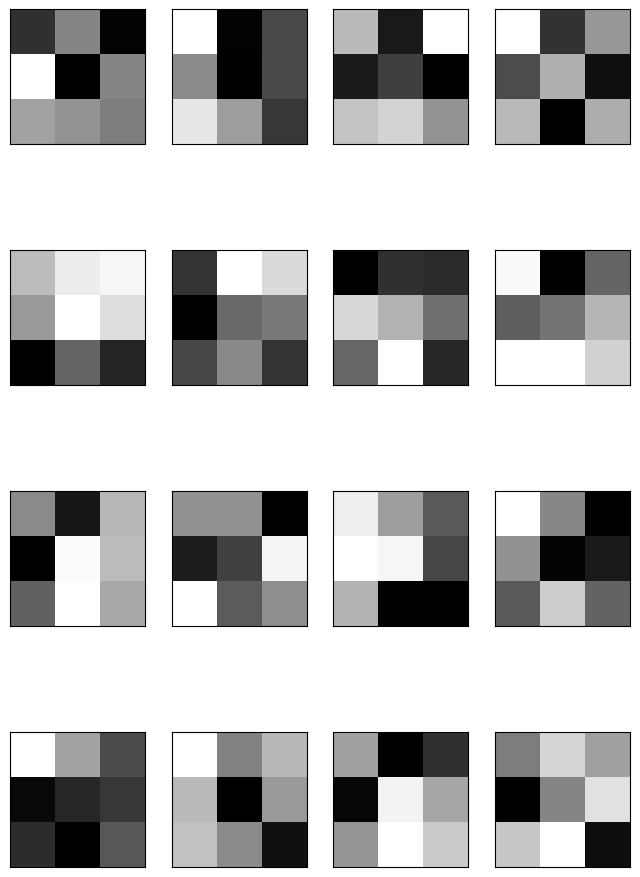

In [35]:
fig1=plt.figure(figsize=(8,12))
col=4
r=4
n_fil=col*r
for i in range(1,n_fil+1):
    f=filters[:, :, :,i-1]
    fig1=plt.subplot(r,col,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:,:,0],cmap='gray')
plt.show()

In [36]:
conv_ind=[1,2,5]
outputs=[model.layers[i].output for i in conv_ind]
model_short=keras.Model(inputs=model.inputs,outputs=outputs)
print(model_short.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30, 30, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,568 (381.12 KB)

 Trainable params: 97,504 (380.88 KB)

 Non-trainable params: 64 (256.00 B)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


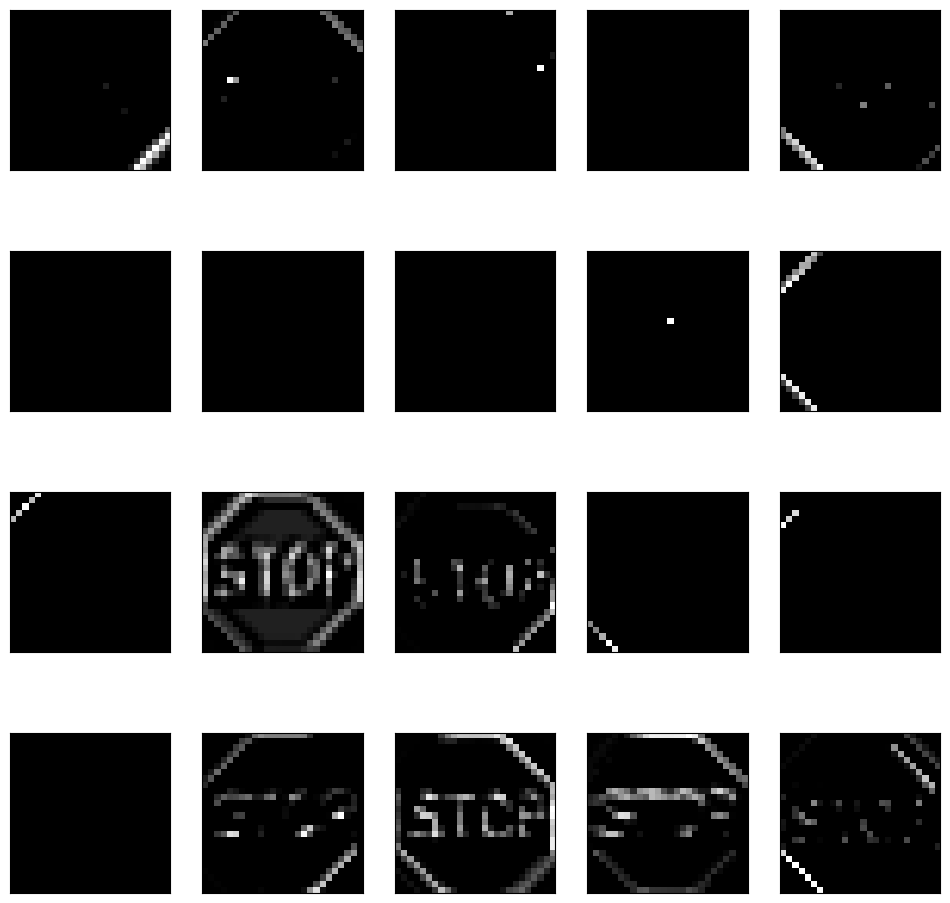

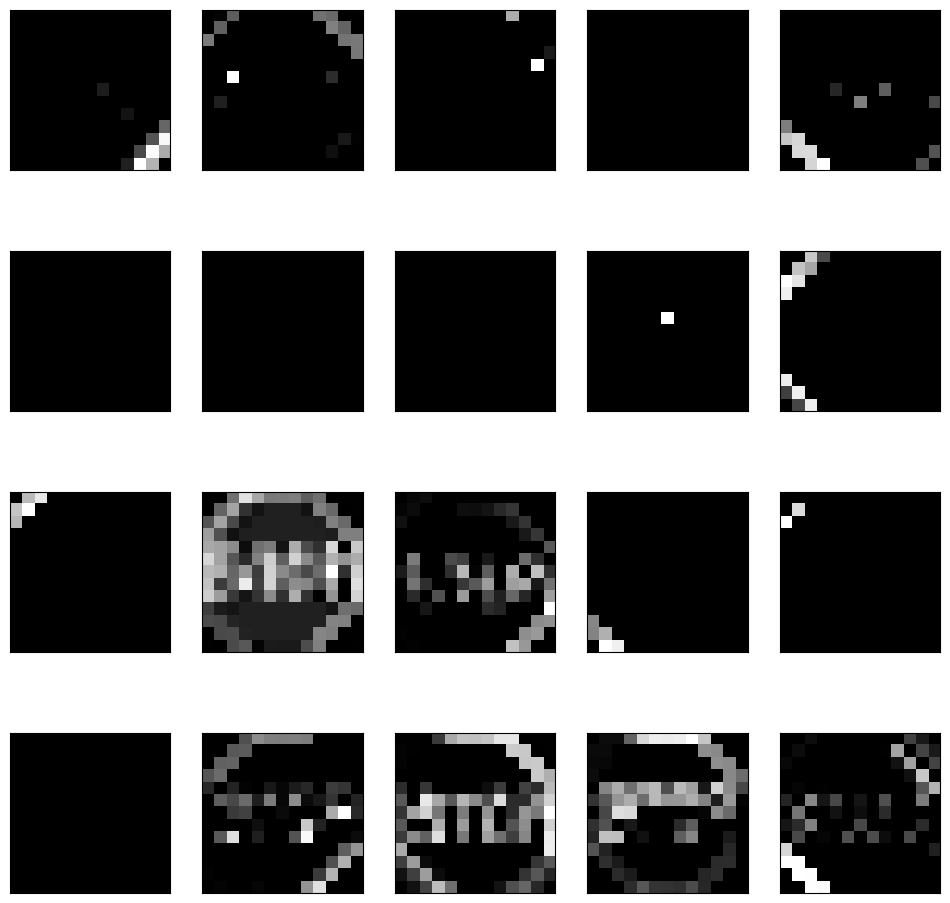

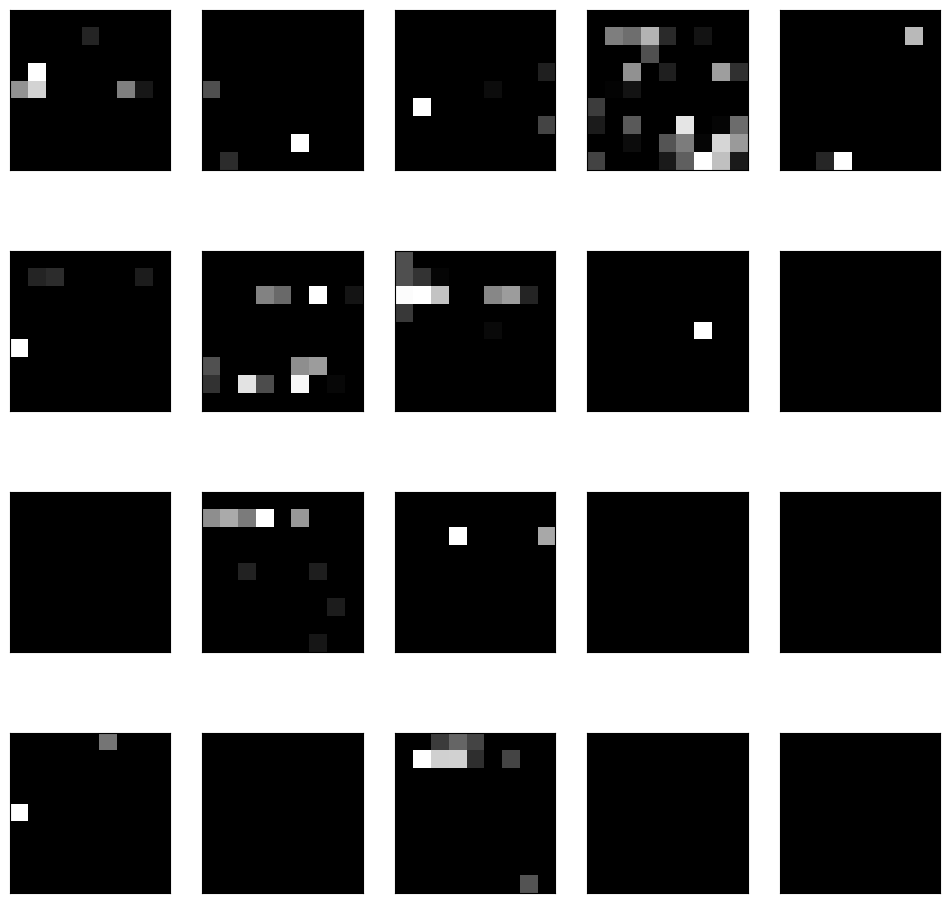

In [37]:
from keras.preprocessing .image import load_img,img_to_array
img=load_img(r"C:\Users\SIVA KUMAR\Downloads\GTTSB\190.png",target_size=(30,30))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
feature_output=model_short.predict(img)
col=5
r=4
for ftr in feature_output:
    fig=plt.figure(figsize=(12,12))
    for i in range(1,col*r+1):
        fig=plt.subplot(r,col,i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0,:,:,i-1],cmap='gray')
plt.show()

In [38]:
import matplotlib.pyplot as plt

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,511,139 (13.39 MB)

 Trainable params: 1,169,931 (4.46 MB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 2,339,864 (8.93 MB)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


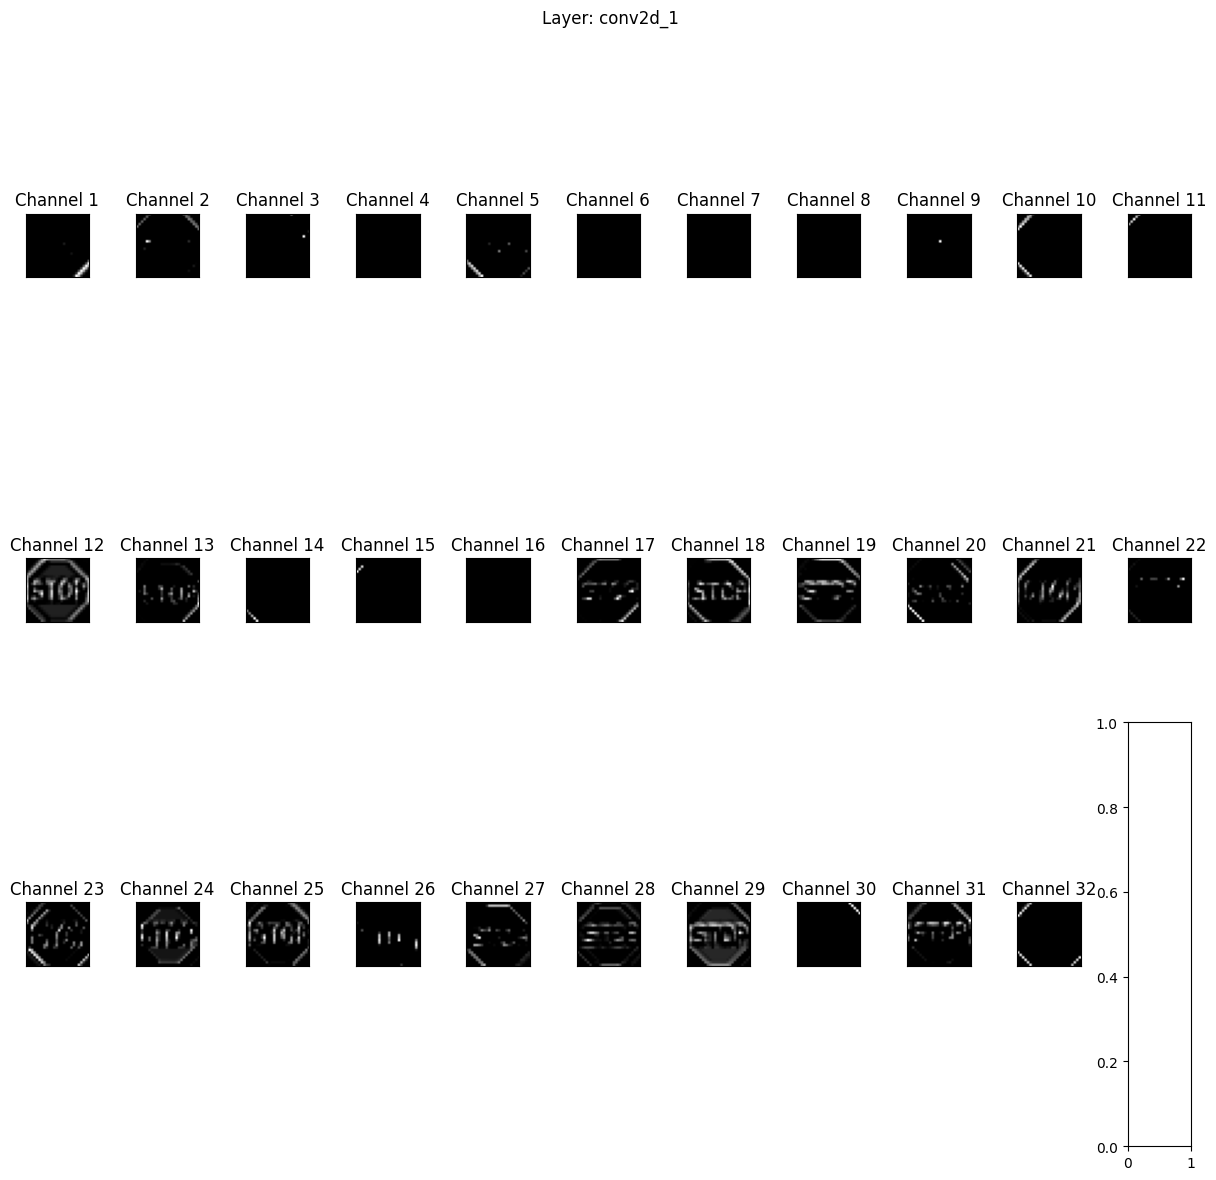

Error: index 9 is out of bounds for axis 0 with size 9


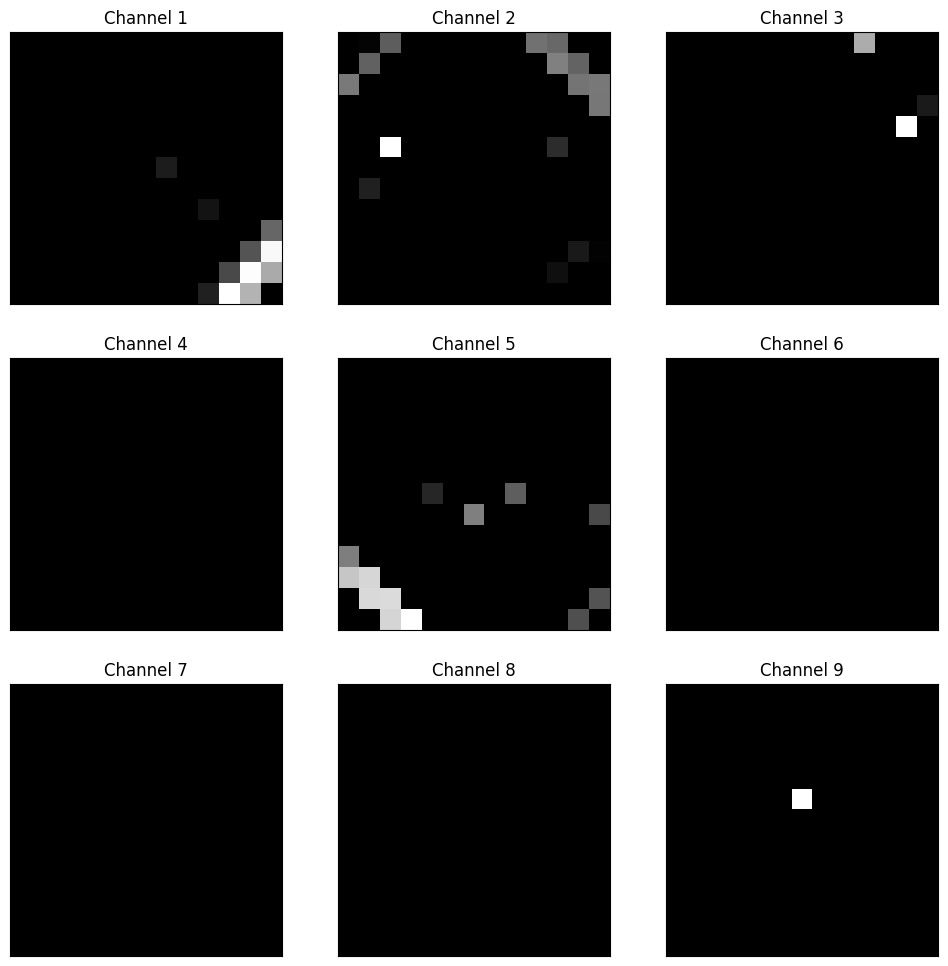

In [39]:
#printing connv layer output
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Import from correct module (TensorFlow 2.x)
import numpy as np
import matplotlib.pyplot as plt

# Assuming your model is defined and built (call `model.build()` before using it)
def model_shortpredict(inputs, conv_ind):
  """Predicts with the short model and returns feature outputs with layer names."""
  outputs = [model.layers[i].output for i in conv_ind]
  short_model =keras.Model(inputs=model.inputs, outputs=outputs)
  feature_outputs = short_model.predict(inputs)
  layer_names = [model.layers[i].name for i in conv_ind]
  return list(zip(layer_names, feature_outputs))

# Print the model summary for debugging
print(model.summary())  # Add this line

# Specify the convolution layers in conv_ind (ensure valid indices)
conv_ind = [1, 2, 5, 6]  # Adjust indices based on your model

# Specify the image filename (assuming it's in the same directory)
image_filename = "C:/Users/SIVA KUMAR/Downloads/GTTSB/190.png"

try:
  # Load the image and handle potential errors
  img = load_img(image_filename, target_size=(30, 30))

  if img is None:
    raise Exception(f"Error loading image: {image_filename}")

  # Convert the image to a NumPy array
  img = img_to_array(img)

  # Expand dimensions for compatibility with the model (if necessary)
  img = np.expand_dims(img, axis=0)

  # Get the feature outputs and layer names
  layer_outputs = model_shortpredict(img, conv_ind)

  # Display the feature outputs with layer names
  cols = 3  # Define cols globally for subplot layout
  for i, (layer_name, feature_maps) in enumerate(layer_outputs):
    n_features = feature_maps.shape[-1]  # Get the number of feature maps
    rows = 3  # Adjust rows as needed (depending on preference and number of features)
    cols = (n_features + cols - 1) // cols  # Adjust cols based on number of features

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    # Iterate through feature maps and display them
    for j in range(n_features):
      ax = axes.flat[j]  # Flatten the axes for easier access
      ax.set_xticks([])
      ax.set_yticks([])
      ax.imshow(feature_maps[0, :, :, j], cmap='gray')  # Display each feature map
      ax.set_title(f"Channel {j+1}")

    fig.suptitle(f"Layer: {layer_name}")
    plt.tight_layout()
    plt.show()

except Exception as e:
  print(f"Error: {e}")


In [45]:
from tensorflow import keras
import cv2
import numpy as np

# Function to load and preprocess the image
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define input shape
input_shape = (IMG_HEIGHT, IMG_WIDTH, channels)

# Create the model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

# Load and preprocess the image
image_path = 'C:/Users/SIVA KUMAR/Downloads/GTTSB/190.png'
input_image = load_image(image_path)

# Get the output of the flatten layer
flatten_layer = model.get_layer('flatten_6')
flatten_output = flatten_layer(input_image)

print(flatten_output)

tf.Tensor([[0.1254902 0.1254902 0.1254902 ... 0.1254902 0.1254902 0.1254902]], shape=(1, 2700), dtype=float32)


In [46]:
from tensorflow import keras
import cv2
import numpy as np

# Function to load and preprocess the image
def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define input shape
input_shape = (IMG_HEIGHT, IMG_WIDTH, channels)

# Create the model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5, name='dropout_1'),
])

# Load and preprocess the image
image_path = 'C:/Users/SIVA KUMAR/Downloads/GTTSB/190.png'
input_image = load_image(image_path)


# Get the output of the dropout_1 layer
dropout_layer = model.get_layer('dropout_1')
dropout_output = dropout_layer(flatten_output)

# Get the shape of the dropout_output
dropout_output_shape = dropout_output.shape[1]

# Add the final dense layer with the correct input shape
dense_output = keras.layers.Dense(43, activation='softmax', input_shape=(dropout_output_shape,))(dropout_output)
print('Output of the dropout_1 layer:', dropout_output)
print('Output of the dense_2 layer:', dense_output)

Output of the dropout_1 layer: tf.Tensor([[0.1254902 0.1254902 0.1254902 ... 0.1254902 0.1254902 0.1254902]], shape=(1, 2700), dtype=float32)
Output of the dense_2 layer: tf.Tensor(
[[0.06119714 0.02137068 0.0150123  0.01137629 0.02924534 0.03345305
  0.02190841 0.0191915  0.0349955  0.01393753 0.06949228 0.01681724
  0.02829122 0.01504163 0.01984789 0.0264816  0.01247718 0.02321135
  0.00812395 0.00411582 0.01910421 0.0170015  0.02492877 0.01096395
  0.0145498  0.05767097 0.01019719 0.04019247 0.01895217 0.0074909
  0.01144632 0.03104169 0.02023301 0.01679144 0.00820623 0.04930311
  0.03997471 0.01898038 0.03505022 0.02650099 0.01135699 0.01651
  0.00796505]], shape=(1, 43), dtype=float32)


C:\Users\SIVA KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
from playsound import playsound
from gtts import gTTS  # Assuming gTTS is installed

In [48]:
from sklearn.metrics import classification_report

In [49]:
#Classification report

In [50]:
print(classification_report(labels, pred_classes))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49        60
           1       0.97      1.00      0.98       720
           2       0.99      0.99      0.99       750
           3       0.98      0.98      0.98       450
           4       1.00      0.98      0.99       660
           5       0.99      0.96      0.98       630
           6       0.99      0.97      0.98       150
           7       0.99      0.98      0.99       450
           8       1.00      0.94      0.97       450
           9       1.00      0.99      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.96      0.97       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [51]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred_classes)
print(cf)

[[ 60   0   0 ...   0   0   0]
 [  1 719   0 ...   0   0   0]
 [  0   4 742 ...   0   0   0]
 ...
 [  2   0   0 ...  82   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   0   0 ...   0   0  90]]


In [66]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 819.2 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 766.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 888.4 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 901.1 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00


In [ ]:
#Visualizing the confusion matrix

<Axes: >

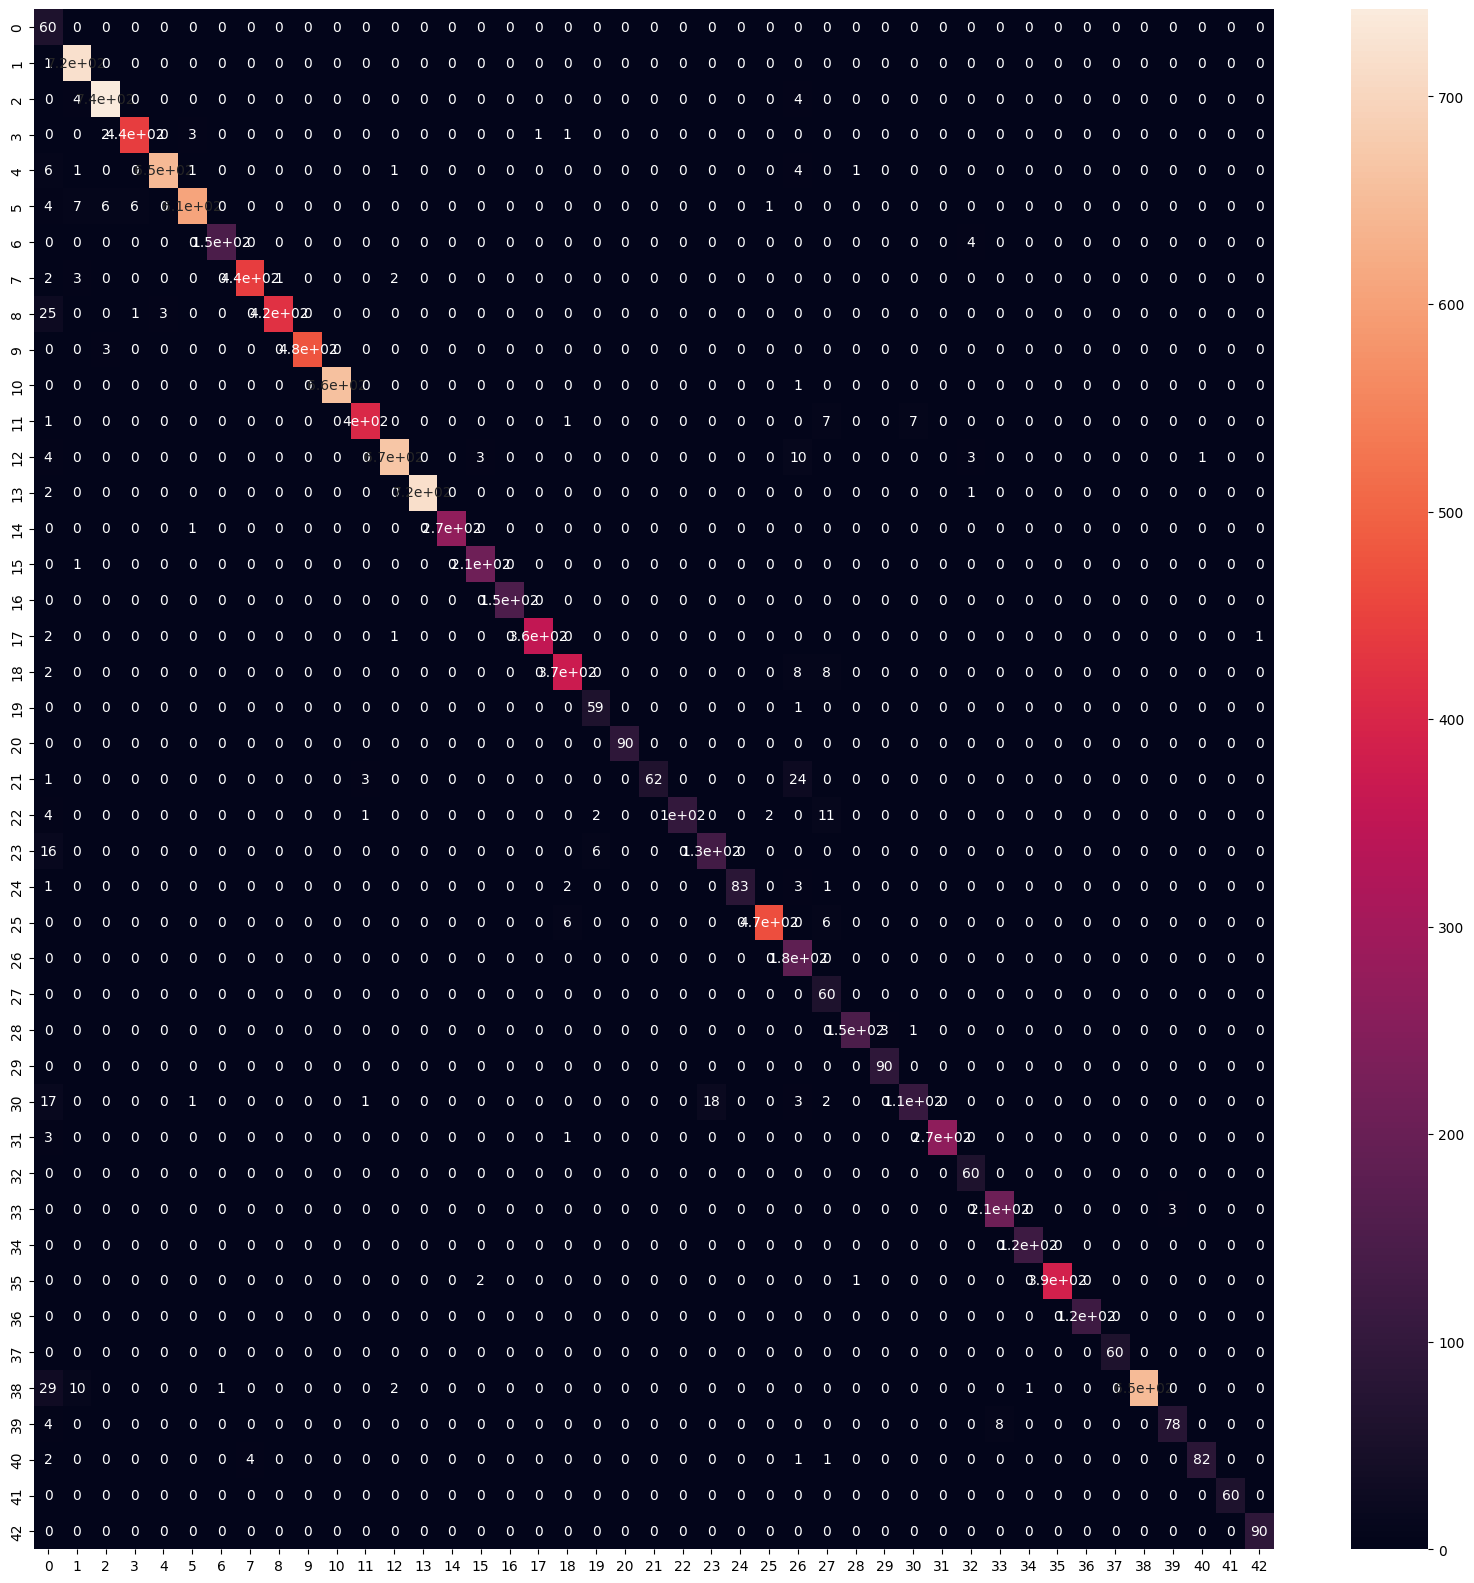

In [52]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [1]:
pip install playsound gTTS


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ------------ --------------------------- 30.7/97.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 92.2/97.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 933.0 kB/s eta 0:00:00
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7043 sha256=29a0d75794cbdd1d7c846a60007d8d627bd5794be3ac8b3061b9b6019edf84c1
  Stored in directory: c:\users\siva kumar\appdata\local\pip\cache\wheels\cf\42\ff\7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound


In [69]:
pip install pyttsx3

   ---------------------------------------- 0.0/197.9 kB ? eta -:--:--
   ------ --------------------------------- 30.7/197.9 kB ? eta -:--:--
   ------------ -------------------------- 61.4/197.9 kB 656.4 kB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 153.6/197.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------  194.6/197.9 kB 454.0 kB/s eta 0:00:01
   -------------------------------------- 197.9/197.9 kB 444.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Enter the class number to predict:  7


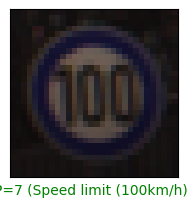

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pyttsx3  # Import pyttsx3 for text-to-speech
# ... (your existing code)

class_number = int(input("Enter the class number to predict: "))
num_images_to_display = 1  # Adjust as needed
engine = pyttsx3.init()
# Find indices of images belonging to the specified class
class_indices = np.where(labels == class_number)[0]

# Check if enough images are available for the class
if len(class_indices) < num_images_to_display:
    print(f"Warning: Only {len(class_indices)} images found for class {class_number}. Displaying all available images.")
    num_images_to_display = len(class_indices)

# Randomly select indices from the class images (if more than requested)
if len(class_indices) > num_images_to_display:
    random_indices = random.sample(list(class_indices), num_images_to_display)
else:
    random_indices = class_indices

start_index = 0
for i in range(num_images_to_display):
  plt.subplot(2,2,2)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = pred[random_indices[i]]
  actual = labels[random_indices[i]]
  
  predicted_class = np.argmax(prediction)
  
  col = 'g' if predicted_class == actual else 'r'
  class_name = classes.get(predicted_class)  # Assuming class_names dictionary
  engine.say(class_name)
  engine.runAndWait()  # Wait for speech completion
plt.xlabel(f'P={predicted_class} ({class_name})', color=col)
plt.imshow(X_test[random_indices[i]])
plt.show()